In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("question3_dataset.xlsx")
df.head()

,customer_id,age,income,purchase_amount,product_category,order_date,is_returned
0,C001,56,38392,731.935920,Grocery,2023-02-27,True
1,C002,46,60535,1475.963554,Clothing,2023-12-12,True
2,C003,32,108603,628.295442,Grocery,2024-04-18,False
3,C004,25,82256,1233.826216,Clothing,2023-04-27,False
4,C005,38,119135,1207.600431,Grocery,2023-05-07,True


In [4]:
#question 1 - 
# Summary statistics of numerical columns
numerical_summary = df.describe()
print(numerical_summary)


              age         income  purchase_amount           order_date
count  100.000000     100.000000       100.000000                  100
mean    37.910000   77809.160000       861.865207  2024-01-07 16:04:48
min     18.000000   30206.000000        76.209277  2023-01-12 00:00:00
25%     26.750000   55141.000000       516.152346  2023-07-13 06:00:00
50%     38.000000   80932.000000       835.891448  2024-01-30 00:00:00
75%     46.250000   98107.250000      1241.539576  2024-07-10 00:00:00
max     59.000000  119474.000000      1494.567865  2024-12-29 00:00:00
std     12.219454   26058.643576       406.942584                  NaN


In [6]:
#question 2 - 
# Summary statistics of character (object) columns
char_summary = df.describe(include=['object'])
print(char_summary)


       customer_id product_category
count          100              100
unique         100                4
top           C001         Clothing
freq             1               29


In [7]:
#question 3 - 
# Summary statistics for all columns
all_summary = df.describe(include='all')
print(all_summary)


       customer_id         age         income  purchase_amount  \
count          100  100.000000     100.000000       100.000000   
unique         100         NaN            NaN              NaN   
top           C001         NaN            NaN              NaN   
freq             1         NaN            NaN              NaN   
mean           NaN   37.910000   77809.160000       861.865207   
min            NaN   18.000000   30206.000000        76.209277   
25%            NaN   26.750000   55141.000000       516.152346   
50%            NaN   38.000000   80932.000000       835.891448   
75%            NaN   46.250000   98107.250000      1241.539576   
max            NaN   59.000000  119474.000000      1494.567865   
std            NaN   12.219454   26058.643576       406.942584   

       product_category           order_date is_returned  
count               100                  100         100  
unique                4                  NaN           2  
top            Clothing       

In [9]:
#qeustion 4 - 
purchase_stats = {
    'count': df['purchase_amount'].count(),
    'mean': df['purchase_amount'].mean(),
    'std': df['purchase_amount'].std(),
    'min': df['purchase_amount'].min(),
    '25%': df['purchase_amount'].quantile(0.25),
    '50%': df['purchase_amount'].quantile(0.50),
    '75%': df['purchase_amount'].quantile(0.75),
    'max': df['purchase_amount'].max()
}

# Display the summary statistics
purchase_stats_df = pd.DataFrame(purchase_stats, index=[0])
print(purchase_stats_df)


   count        mean         std        min         25%         50%  \
0    100  861.865207  406.942584  76.209277  516.152346  835.891448   

           75%          max  
0  1241.539576  1494.567865  


In [10]:
#question 5 - 
# Find the range of the 'purchase_amount' column
purchase_range = df['purchase_amount'].max() - df['purchase_amount'].min()
print(f"Range of 'purchase_amount': {purchase_range}")



Range of 'purchase_amount': 1418.3585874064847


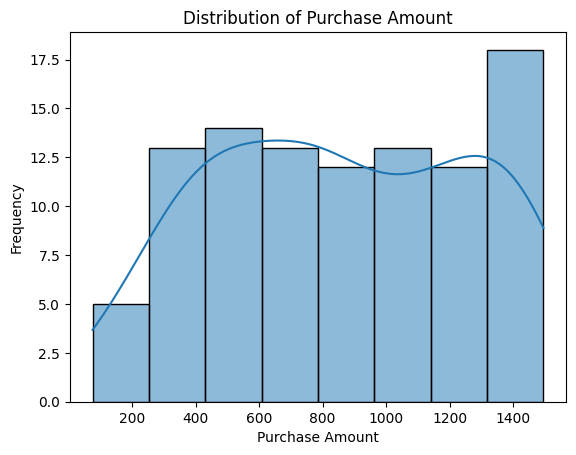

Mean: 861.8652070688886, Median: 835.8914481772872, Mode: 76.20927724250527


In [11]:
#question 6 - 
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean, median, and mode
mean_val = df['purchase_amount'].mean()
median_val = df['purchase_amount'].median()
mode_val = df['purchase_amount'].mode()[0]

# Plot distribution
sns.histplot(df['purchase_amount'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Confirm if mean > median > mode
print(f"Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")


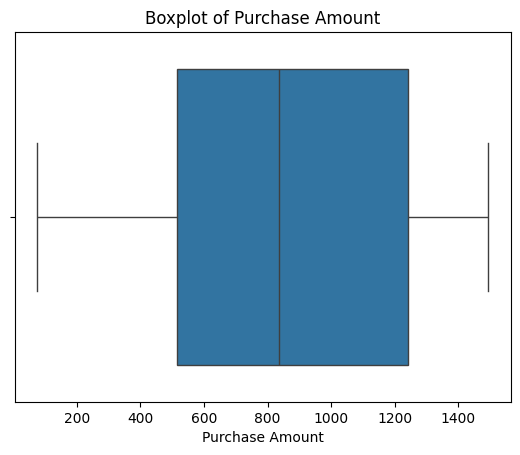

In [12]:
#question 7 - 
# Boxplot for 'purchase_amount'
sns.boxplot(x=df['purchase_amount'])
plt.title('Boxplot of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.show()


In [13]:
#question 8 - 
# Group by 'product_category' and get descriptive statistics for 'purchase_amount'
category_stats = df.groupby('product_category')['purchase_amount'].describe()
print(category_stats)


                  count        mean         std         min         25%  \
product_category                                                          
Books              27.0  939.446761  412.128356  326.820995  506.488093   
Clothing           29.0  842.170821  401.116123   76.209277  581.379738   
Electronics        19.0  826.750592  390.147378  159.252071  572.471520   
Grocery            25.0  827.609724  433.354279  152.103390  461.685413   

                          50%          75%          max  
product_category                                         
Books             1019.939887  1316.432833  1474.144098  
Clothing           835.099562  1129.047258  1491.963321  
Electronics        773.830401  1070.027101  1494.567865  
Grocery            731.935920  1207.600431  1469.394644  


In [14]:
#question 9 - 
# Aggregate functions for 'purchase_amount' per product category
agg_stats = df.groupby('product_category')['purchase_amount'].agg(['mean', 'std', 'var', 'median'])
print(agg_stats)


                        mean         std            var       median
product_category                                                    
Books             939.446761  412.128356  169849.782125  1019.939887
Clothing          842.170821  401.116123  160894.144134   835.099562
Electronics       826.750592  390.147378  152214.976771   773.830401
Grocery           827.609724  433.354279  187795.931078   731.935920


                      age    income  purchase_amount
age              1.000000 -0.220107         0.033165
income          -0.220107  1.000000        -0.033436
purchase_amount  0.033165 -0.033436         1.000000


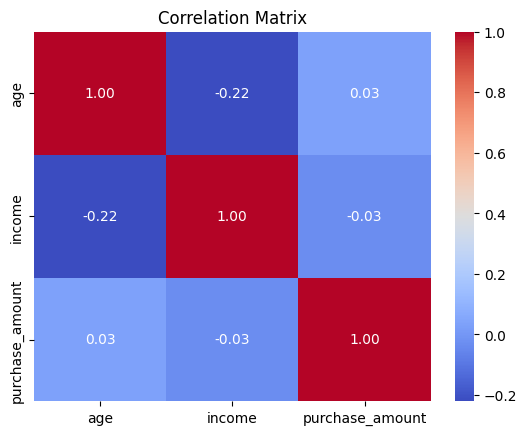

In [15]:
#question 10 - 
# Compute the correlation matrix
correlation_matrix = df[['age', 'income', 'purchase_amount']].corr()
print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


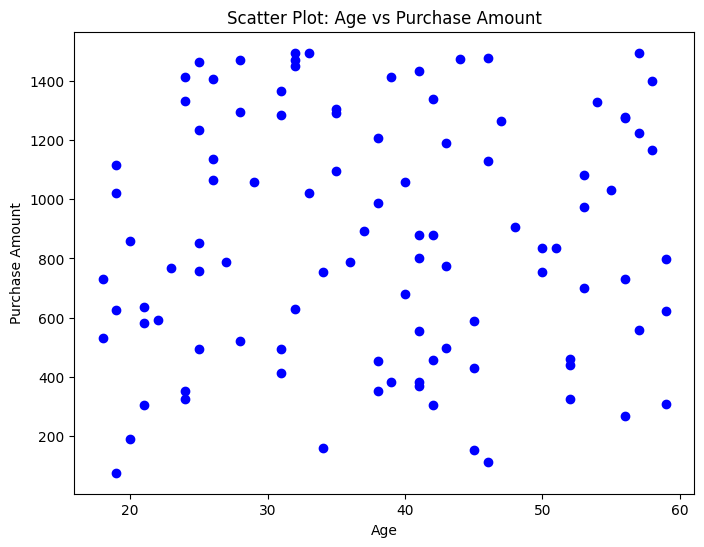

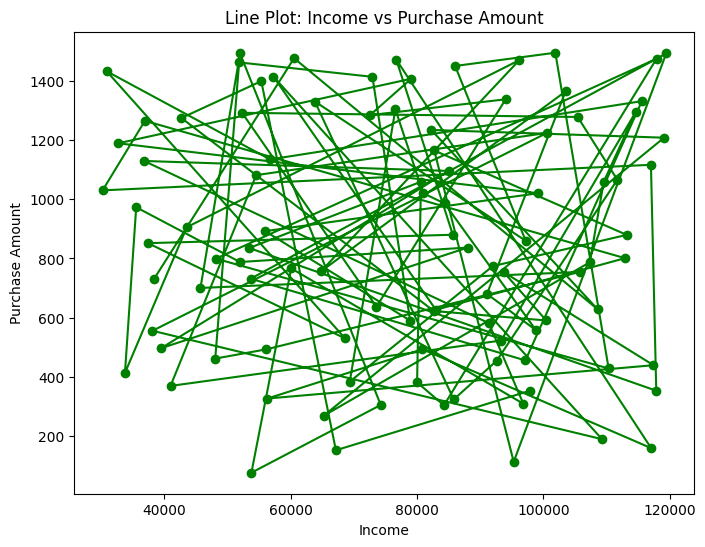

In [16]:
#question 11 - 
# Scatter plot to show the relationship between 'age' and 'purchase_amount'
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['purchase_amount'], color='blue')
plt.title('Scatter Plot: Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

# Line plot to show a trend in 'purchase_amount' over 'income'
plt.figure(figsize=(8,6))
plt.plot(df['income'], df['purchase_amount'], marker='o', color='green')
plt.title('Line Plot: Income vs Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.show()
